In [ ]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

In [30]:
!pip install japanize_matplotlib

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from PIL import Image

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# (1) 閾値ごとの偽陽性と再現率、ROC曲線の描写

In [ ]:
# -------------------------------(1)--------------------------------
# 読み込み
df = pd.read_csv("logis.csv")
y_true = df["y"].to_numpy()
p = df["p"].to_numpy()
# print(df) # 確認

# 閾値のリスト
thlist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# 閾値の値ごとに、偽陽性と再現率、ROC曲線を記す
for th in thlist:
  # yを閾値ごとに0or1に分ける
  y_pred = np.array([1 if x > th else 0 for x in p])
  # print(y_true) # 確認
  # print(y_pred) # 確認

  # 混同行列
  con_m = confusion_matrix(y_true, y_pred)
  # print(con_m) # マトリクス確認
  tn, fp, fn, tp = con_m.flatten()
  fpr1 = fp/(tn+fp)

  print(f"閾値が{th}のとき")
  print(f"偽陽性率 = {fpr1}")
  print(f"再現率 = {recall_score(y_true, y_pred)}\n")


閾値が0.0のとき
偽陽性率 = 1.0
再現率 = 1.0

閾値が0.1のとき
偽陽性率 = 0.36
再現率 = 1.0

閾値が0.2のとき
偽陽性率 = 0.24
再現率 = 0.98

閾値が0.3のとき
偽陽性率 = 0.22
再現率 = 0.92

閾値が0.4のとき
偽陽性率 = 0.16
再現率 = 0.88

閾値が0.5のとき
偽陽性率 = 0.14
再現率 = 0.88

閾値が0.6のとき
偽陽性率 = 0.1
再現率 = 0.88

閾値が0.7のとき
偽陽性率 = 0.06
再現率 = 0.84

閾値が0.8のとき
偽陽性率 = 0.0
再現率 = 0.76

閾値が0.9のとき
偽陽性率 = 0.0
再現率 = 0.58

閾値が1.0のとき
偽陽性率 = 0.0
再現率 = 0.0



# 計算結果からわかること

閾値が0.0の場合：

すべてのケースを陽性と予測しているため、再現率は1.0(最大)だが、偽陽性率も1.0(最大)。過剰診断をしている。

閾値を上げると：

偽陽性率が減少し、モデルはより慎重に陽性を予測だが、再現率も低下し、一部の病気のケースを見逃すリスクが増える。


閾値が1.0の場合：

すべてのケースを陰性と予測しているため、偽陽性率は0.0(最小)だが、再現率も0.0(最小)であり、すべての病気のケースを見逃している。

# (2) AUCの値

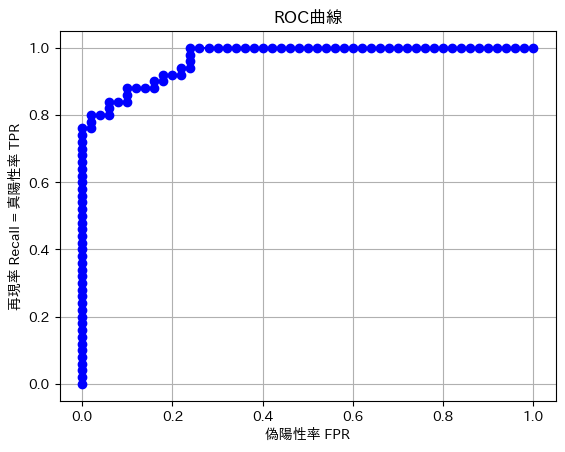

AUC は 0.9672000000000001


In [ ]:
# ----------------------------(2)--------------------------------
  fpr, recall, thresholds = roc_curve(y_true,  p,  drop_intermediate = False)
  plt.plot(fpr, recall, marker='o', c="b")
  plt.xlabel('偽陽性率 FPR')
  plt.ylabel('再現率 Recall = 真陽性率 TPR')
  plt.title(f"ROC曲線")
  plt.grid()
  #plt.savefig('sklearn_roc_curve.png')
  plt.show()

  print(f"AUC は {roc_auc_score(y_true, p)}")

# (3) 良い閾値とは

結論を先に述べます。

閾値は

グラフから読み取るなら、「0.6」

病気の重要度が高いなら、「0.2」

偽陽性を出したくないなら、「0.8」

ーー以下説明ーー

病気の性質によっては、その病気がどれだけ命に影響があるかで、誤診や見逃しのリスクが変わる。

重大な病気で、見逃しを最小限に抑えたい場合は、再現率を優先する閾値を選ぶ。

その面を無視したとして、数値やグラフから目視で選ぶなら、

当然、偽陽性を最小限に抑えながら、より高い再現率を選ぶ必要があるので、

ROC曲線の偽陽性0.0、再現率1.0から最も近そうに見える、

「偽陽性0.1、再現率0.9」に近い点があてはまると思われる。

そして、(1)で計算した中でそれに近いときの閾値は「「「0.6」」」である。

もし、早期発見必須で重大な病気、偽陽性覚悟で一切見逃してはいけないのならば、

再現率1.0の中で、一番偽陽性を最小に抑えられている点である、

「偽陽性0.25、再現率1.0」あたりの点で、(1)でそれに近い閾値である「「0.2」」

があてはまると思われる。

偽陽性だけは絶対してはいけないのならば、

偽陽性が0で再現率が一番高い点、

「偽陽性0.0、再現率0.75」あたりの点で、(1)でそれに近い閾値である「「0.8」」

があてはまると思われます。


※閾値11パターンの計算結果と目視による判断なので色々荒いです。
